In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')
sns.set_style('dark')
%matplotlib inline


In [13]:
df = pd.read_excel('../1_Original Data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# Create copy of data because file is too huge
df1 = df

In [15]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

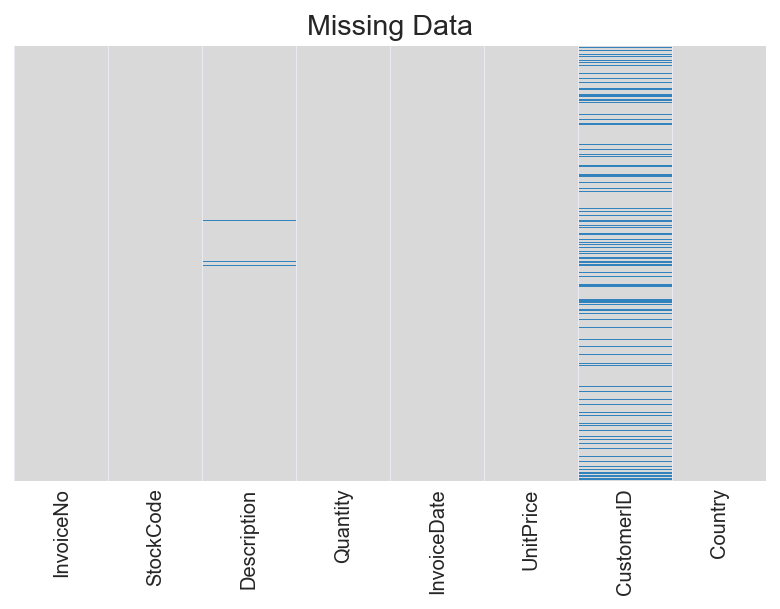

In [40]:
sns.heatmap(df1.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [47]:
# No. of data with missing Values
df1['CustomerID'].isnull().sum()

135080

In [48]:
# Drop Data with missing Customer ID
df1.dropna(inplace=True)

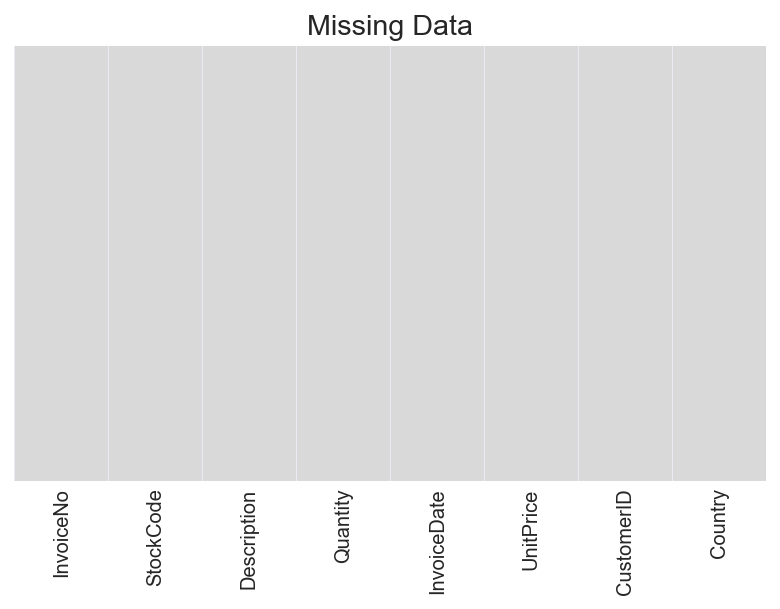

In [49]:
sns.heatmap(df1.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [50]:
# Unique values in each feature
for i in df1.columns:
    print(i,len(df1[i].unique()))

InvoiceNo 22190
StockCode 3684
Description 3896
Quantity 436
InvoiceDate 20460
UnitPrice 620
CustomerID 4372
Country 37


Text(0,0.5,'Count')

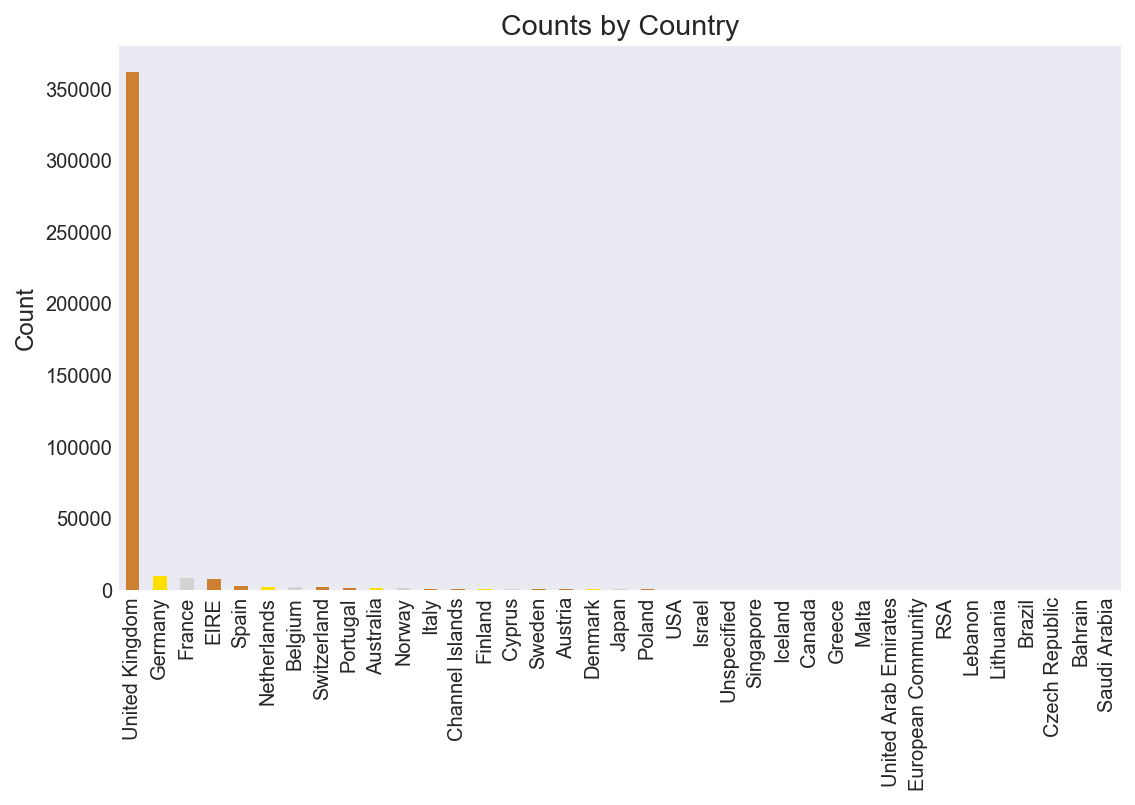

In [51]:
# Create graph for Counts by country 
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

df1['Country'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],)
ax.set_title('Counts by Country')
ax.set_ylabel('Count')

In [52]:
# Restrict only by UK results
df1 = df1[df1['Country'] == 'United Kingdom']

In [53]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [59]:
# Remove Negative Quantity and zero Unit Price
df1 = df1[df1['Quantity'] > 0]
df1 = df1[df1['UnitPrice'] > 0]
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [62]:
# Unique values in each feature
for i in df1.columns:
    print(i,len(df1[i].unique()))

InvoiceNo 16646
StockCode 3645
Description 3844
Quantity 293
InvoiceDate 15612
UnitPrice 402
CustomerID 3920
Country 1


In [63]:
# Create new feature - Total Price
df1['Total Price'] = df1['Quantity'] * df1['UnitPrice']

In [75]:
df1.describe()

,Quantity,UnitPrice,CustomerID,Total Price
count,354321.000000,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392,20.626470
std,189.267956,17.862655,1594.527150,326.044012
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,14194.000000,4.160000
50%,4.000000,1.950000,15522.000000,10.200000
75%,12.000000,3.750000,16931.000000,17.700000
max,80995.000000,8142.750000,18287.000000,168469.600000


### Recency

In [64]:
from datetime import datetime

In [72]:
# Date Range
print('From',df1['InvoiceDate'].min())
print('To', df1['InvoiceDate'].max())

From 2010-12-01 08:26:00
To 2011-12-09 12:49:00


In [73]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [74]:
NOW = datetime(2011,12,10)

In [140]:
df1.groupby('Country').max()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total Price
Country,,,,,,,
United Kingdom,581586,ZINC WIRE SWEETHEART LETTER TRAY,80995,2011-12-09 12:49:00,8142.75,18287.0,168469.6


In [141]:
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                          'InvoiceNo': lambda x: len(x),
                                          'Total Price': lambda x: x.sum()})

In [142]:
rfmTable.head()

,InvoiceDate,InvoiceNo,Total Price
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [143]:
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.head()

,InvoiceDate,InvoiceNo,Total Price
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [144]:
rfmTable.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total Price': 'Monetary_value'}, inplace=True)

rfmTable.head()

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [145]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [146]:
segmented_rfm = rfmTable

In [147]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [150]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary_value'].apply(FMScore, args=('Monetary_value',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4595,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [188]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)

Index(['Recency', 'Frequency', 'Monetary_value', 'r_quartile', 'f_quartile',
       'm_quartile', 'RFMScore'],
      dtype='object')

In [184]:
segmented_rfm = segmented_rfm.sort_values('RFMScore', ascending=False)

In [197]:
cust_seg = (segmented_rfm.groupby('RFMScore')['RFMScore'].size()).sort_values(ascending=False)

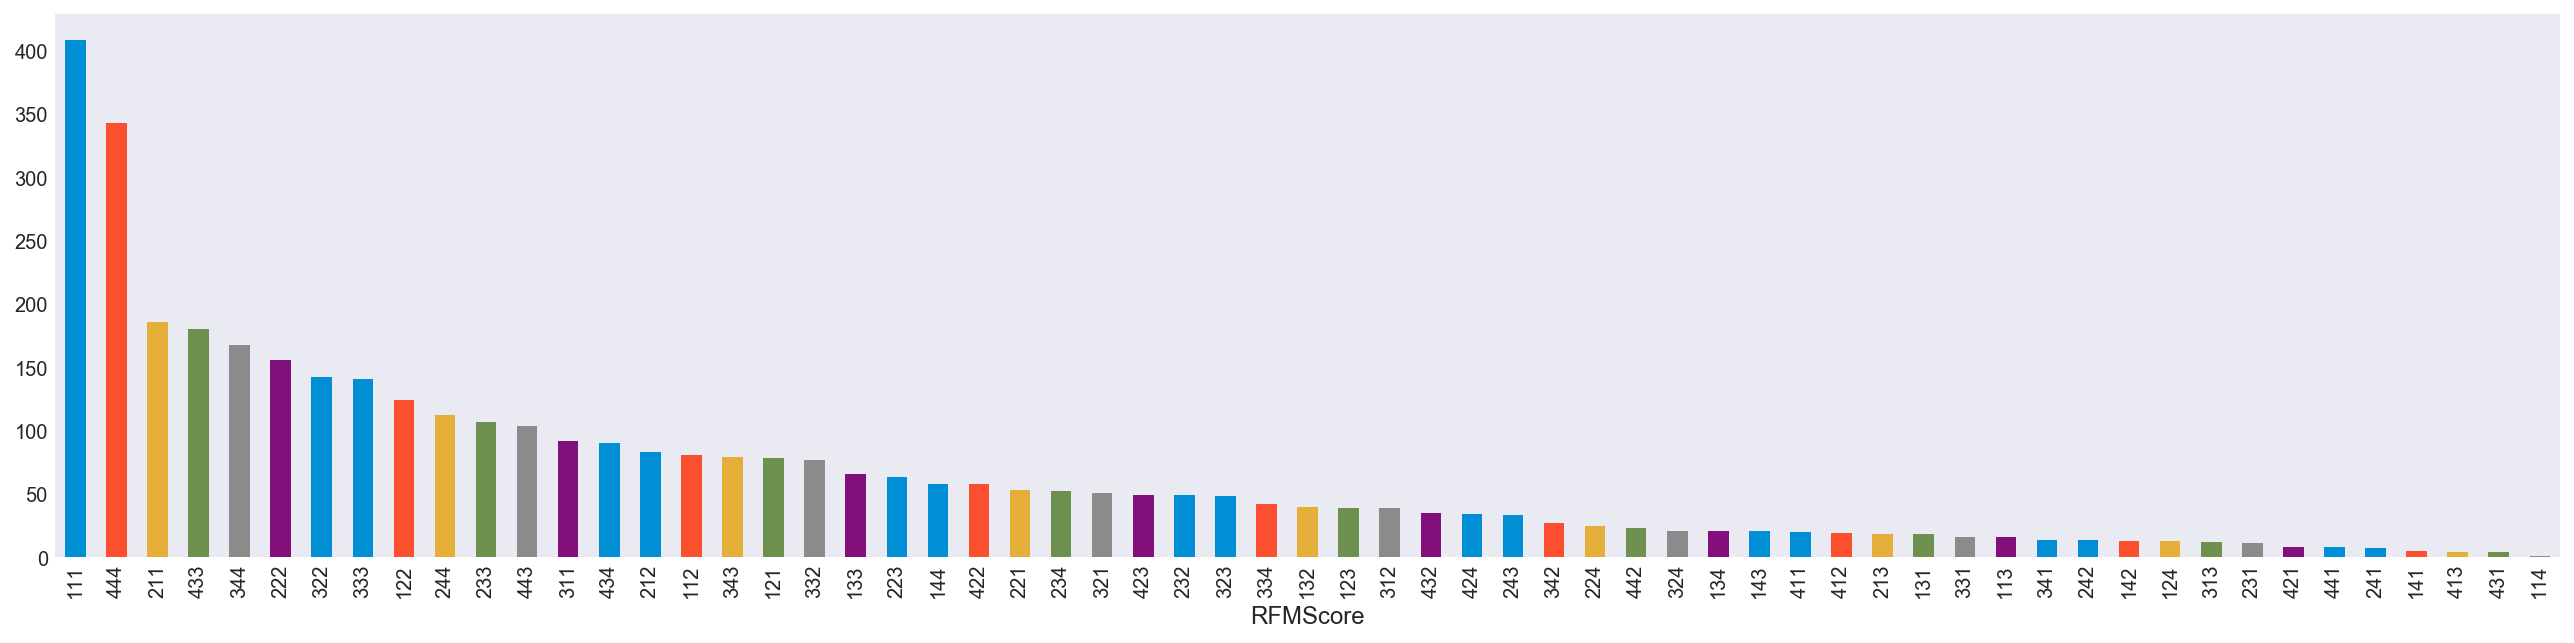

In [199]:
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
cust_seg.plot.bar()